In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('ENRG.JK.csv').fillna(0)


In [3]:
new_data = data.loc[:,['Close','IHSG Close(D-1)','Close(D-1)','Close(D-2)','Close(D-3)']]



from sklearn.model_selection import train_test_split

x= new_data.drop(['Close'],axis=1)
y = new_data['Close']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)
test_data = X_test.join(Y_test)
train_data = X_train.join(Y_train)

## No 1 
### cari nilai r square dari data close - close d-3 + ihsg d-1




## SKLearn R Square

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x,y)

r_square = reg.score(x,y)
r_square

0.9396305741210755

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
reg.fit(X_train_s, Y_train)
r_square_s = reg.score(X_test_s, Y_test)
r_square_s

0.7173764412299306

## StatModel

In [6]:
 import statsmodels.api as sm

In [7]:
mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary()) 


                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.271e+04
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                   4.66e-277
Time:                        20:42:42   Log-Likelihood:                         -1049.5
No. Observations:                 243   AIC:                                      2107.
Df Residuals:                     239   BIC:                                      2121.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

### <b>Penjelasan<b>
<p>
    Berdasarkan hasil diatas dapat diketahui bahwa model linear regression yang dibuat menggunakan data IHSG Close(D-1), Close(D-1),Close(D-2),Close(D-3) adalah model yang baik dalam menjelaskan tentang pengaruh variabel Close(D-X) dan IHSH(D-1) terhadap variabel Close. tetapi tidak semua variabel yang digunakan untuk memiliki pengaruh tinggi terhadap variabel Close. hal ini dapat dilihat dari nilai P>|t| (P value) pada variabel Close(D-2) dan Close(D-3) yang memiliki nilai lebih dari 0.05
</p>

## No 2
### Cari nilai r square tertinggi diantara data close dengan close d-1 sampai d- 7

In [8]:
new_data = data.loc[:,['Close','Close(D-1)','Close(D-2)','Close(D-3)','Close(D-4)','Close(D-5)','Close(D-1)']]



from sklearn.model_selection import train_test_split

x= new_data.drop(['Close'],axis=1)
y = new_data['Close']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)
test_data = X_test.join(Y_test)
train_data = X_train.join(Y_train)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x,y)

r_square = reg.score(x,y)
r_square

#D1 0.8424045873743625
#D2 0.7248549145720964
#D3 0.6320244861877367
#D4 0.5568575499239653
#D5 0.49470948993949593
#D6 0.440476507520276
#D7 0.39283789187747

0.8424801287289476

<Axes: >

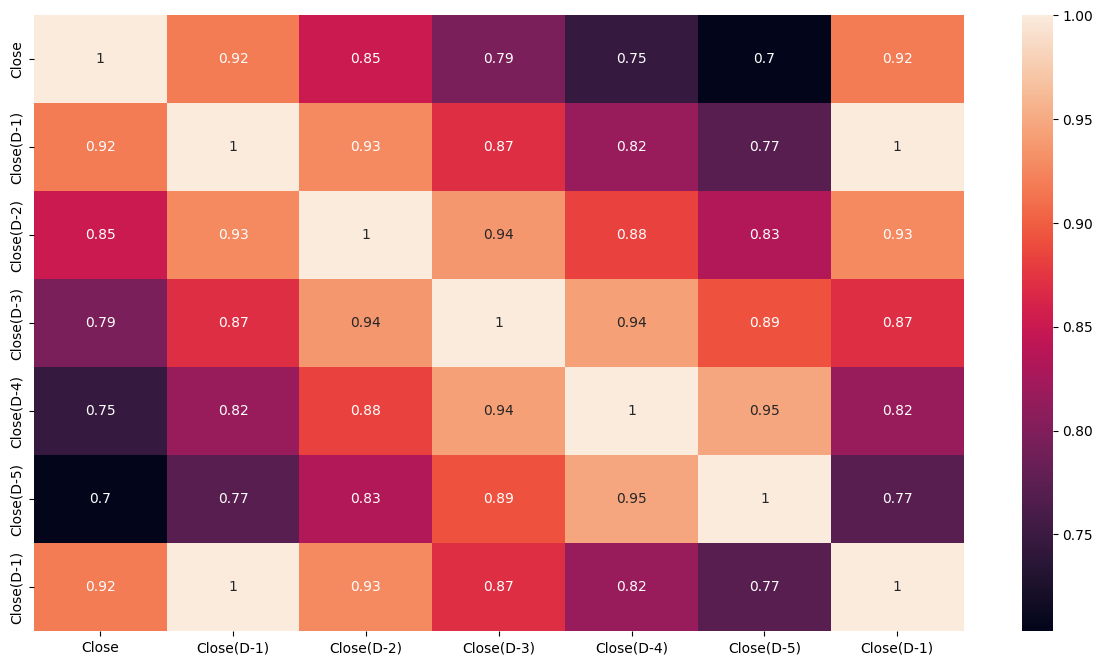

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(new_data.corr(), annot=True)

## Jawaban
<p> hasil diatas menjelaskan tentang besarnya pengaruh variabel Close(D-1) sampai dengan Close(D-7) terhadap variabel / nilai Close. berdasarkan hasil dari perhitungan linear regression dan R Square variabel / nilai Close(D-1) lah yang memiliki pengaruh paling besar terhadap variabel Close</p>

## No 3 (Bonus)
### Buat prediksi data 5 hari kedepan



## Sarimax model (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model)

C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but 

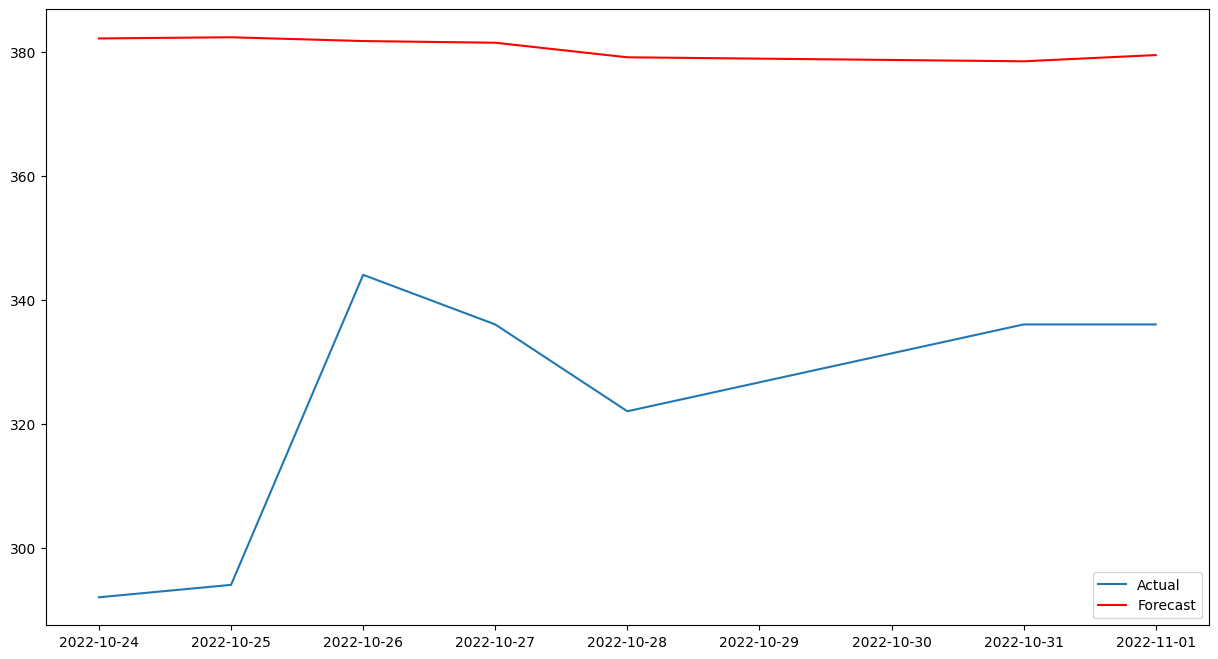

236    379.439865
237    378.434748
238    379.081474
239    381.430025
240    381.701727
241    382.309173
242    382.121621
Name: predicted_mean, dtype: float64
236    379.439865
237    378.434748
238    379.081474
239    381.430025
240    381.701727
241    382.309173
242    382.121621
Name: predicted_mean, dtype: float64


C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lawencon\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import matplotlib.pyplot as plt


# data = pd.read_csv('ENRG.JK.csv')
# data = data.loc[:,['Date','Close']]

# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)


# train = data[:-7]  
# test = data[-7:]  

# # Fit a SARIMA model
# order = (1, 1, 1)  # Example order for non-seasonal part
# seasonal_order = (0, 1, 1, 7)  # Example seasonal order (7 days in a week)
# model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
# model_fit = model.fit()

# # Forecast 7 days into the future
# forecast_values = model_fit.forecast(steps=7)

# # Calculate forecast error
# forecast_error = test - forecast_values

# # Plot the actual and forecasted values
# plt.figure(figsize=(15,8))
# plt.plot(test.index, test.values, label='Actual')
# plt.plot(test.index, forecast_values, color='red', label='Forecast')
# plt.legend()
# plt.show()

# # Predict data for more days into the future (e.g., 7 additional days)
# future_forecast = model_fit.forecast(steps=7)

# print(forecast_values)
# print(future_forecast)

## Sklearn 